## ARIMA

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error


training_data_location = 'occupancy_detection/datatraining.txt'
testing_data_location1 = 'occupancy_detection/datatest.txt'
testing_data_location2 = 'occupancy_detection/datatest2.txt'

# read data from txt file datatrainin.txt
training_data = pd.read_csv(training_data_location, sep=',', header=0)
# read data from txt file datatest.txt
testing_data1 = pd.read_csv(testing_data_location1, sep=',', header=0)
# read data from txt file datatest2.txt
testing_data2 = pd.read_csv(testing_data_location2, sep=',', header=0)

# transform data to pd series
training_data_series = pd.Series(training_data['Occupancy'])
testing_data1_series = pd.Series(testing_data1['Occupancy'])
testing_data2_series = pd.Series(testing_data2['Occupancy'])


In [58]:
# fit the data to an arima model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

result = adfuller(training_data['Occupancy'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

training_data_series_x = training_data_series[:len(training_data_series)//4 * 3]

model = ARIMA(training_data_series, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())



ADF Statistic: -3.430315143177798
p-value: 0.00996783306245402


/home/matteo/anaconda3/envs/reservoir/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/matteo/anaconda3/envs/reservoir/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/matteo/anaconda3/envs/reservoir/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Occupancy   No. Observations:                 8143
Model:                 ARIMA(2, 1, 0)   Log Likelihood               10205.383
Date:                Tue, 01 Oct 2024   AIC                         -20404.766
Time:                        17:20:24   BIC                         -20383.752
Sample:                             0   HQIC                        -20397.580
                               - 8143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1136      0.003    -43.486      0.000      -0.119      -0.109
ar.L2         -0.1364      0.002    -57.265      0.000      -0.141      -0.132
sigma2         0.0048   8.09e-06    589.654      0.0

In [59]:
forecast = model_fit.forecast(steps=len(training_data_series)//4)
print("forecast", forecast)

# calculate the mean squared error
mse = mean_squared_error(training_data['Occupancy'][len(training_data_series)//4 * 3 + 3:], forecast)
print(f'Mean Squared Error: {mse}')

forecast 8143     1.0
8144     1.0
8145     1.0
8146     1.0
8147     1.0
        ... 
10173    1.0
10174    1.0
10175    1.0
10176    1.0
10177    1.0
Name: predicted_mean, Length: 2035, dtype: float64
Mean Squared Error: 0.711056511056511


/home/matteo/anaconda3/envs/reservoir/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/matteo/anaconda3/envs/reservoir/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


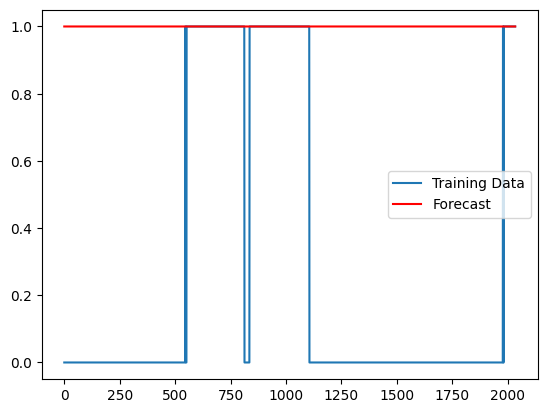

In [60]:
# plot training data and forecast
plt.plot(range(len(training_data['Occupancy'][len(training_data_series)//4 * 3 + 3:])), training_data['Occupancy'][len(training_data_series)//4 * 3 + 3:], label='Training Data')
plt.plot(range(len(forecast)), forecast, color='red', label='Forecast')
plt.legend()

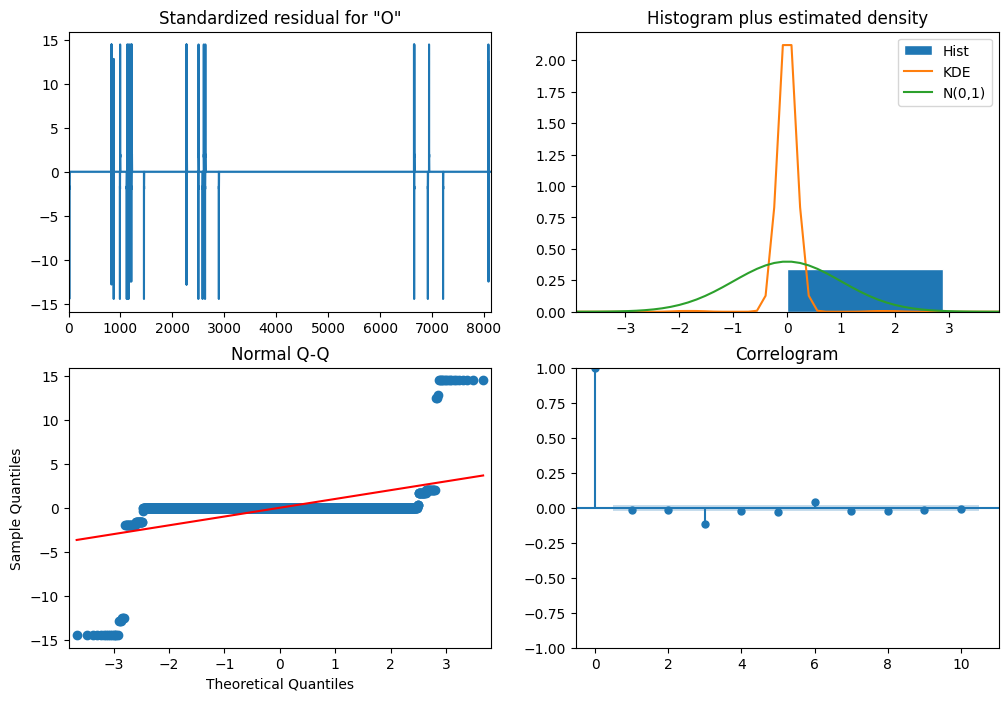

In [61]:
import matplotlib.pyplot as plt

model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

### 1. Standardized Residuals Plot
What it shows: This plot displays the residuals (errors) from the ARIMA model, standardized to have a mean of 0 and standard deviation of 1. Residuals are the difference between the actual values and the predicted values from the model.
What to look for: Ideally, the residuals should look like random noise with no discernible patterns. This would mean the ARIMA model is correctly capturing all the structure in the data. If you see patterns, trends, or non-random behavior, it may indicate that the model could be improved.

### 2. Histogram Plus Estimated Density
What it shows: This is a histogram of the residuals, along with a kernel density estimate (KDE), which provides a smoothed version of the distribution of residuals.
What to look for: The residuals should be normally distributed if the model is well-fitted. The histogram should be bell-shaped, and the KDE line should closely resemble a normal distribution curve (Gaussian). If the distribution is skewed or has heavy tails, it indicates the residuals are not normally distributed.

### 3. Normal Q-Q Plot (Quantile-Quantile Plot)
What it shows: The Q-Q plot compares the quantiles of the residuals to the quantiles of a standard normal distribution. If the residuals are normally distributed, the points should fall along a straight diagonal line.
What to look for: If the points in the Q-Q plot fall mostly along the 45-degree line, it suggests that the residuals are normally distributed. Significant deviations from the line, especially in the tails, indicate non-normality, which could suggest that the model's residuals are not well-behaved.

### 4. Correlogram (ACF Plot of Residuals)
What it shows: This is the Autocorrelation Function (ACF) plot of the residuals. It shows the correlation of the residuals with their own lagged values over time. Each bar represents the correlation of the residual at lag k with its lagged value.
What to look for: Ideally, there should be no significant autocorrelation in the residuals. This would suggest that the ARIMA model has captured all the autocorrelation in the original time series. If you see large spikes outside the confidence bands (usually shown as dotted lines), it indicates that the residuals are autocorrelated, and the model may need improvement (e.g., more AR or MA terms might be necessary).
